<a href="https://colab.research.google.com/github/MK316/Teachingapps/blob/main/maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

Seoul Latitude and Longitude - 37.5665° N, 126.9780° E

In [36]:
df = pd.DataFrame({
    'City': ['New York','Los Angeles','Chicago','Houston','Philadelphia'],
    'Country': ['New Yor', 'California', 'Illinois', 'Texas', 'Pennylvania'],
    'Latitude': [40.71, 34.05, 41.87, 29.76, 39.95],
    'Longitude': [-74.01, -118.24, -87.62, -95.36,-75.16]
})

In [37]:
df["Coordinates"] = list(zip(df.Longitude, df.Latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf


,City,Country,Latitude,Longitude,Coordinates
0,New York,New Yor,40.71,-74.01,POINT (-74.01000 40.71000)
1,Los Angeles,California,34.05,-118.24,POINT (-118.24000 34.05000)
2,Chicago,Illinois,41.87,-87.62,POINT (-87.62000 41.87000)
3,Houston,Texas,29.76,-95.36,POINT (-95.36000 29.76000)
4,Philadelphia,Pennylvania,39.95,-75.16,POINT (-75.16000 39.95000)


In [ ]:
# Grab low resolution world file
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world

world is a GeoDataFrame with the following columns:

+ pop_est: Contains a population estimate for the country
+ continent: The country’s continent
+ name: The country’s name
+ iso_a3: The country’s 3 letter abbreviation (we made this the index)
+ gdp_md_est: An estimate of country’s GDP
+ geometry: A POLYGON for each country (we will learn more about these soon)

In [18]:
world.geometry.name

'geometry'

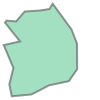

In [19]:
world.loc["KOR", 'geometry']

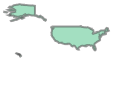

In [42]:
world.loc["USA", 'geometry']

In [27]:
# Returns two arrays that hold the x and y coordinates of the points that define the polygon's exterior.
x, y = world.loc["KOR", "geometry"].exterior.coords.xy

# How many points?
print('Points in the exterior of Albania:', len(x))

Points in the exterior of Albania: 19


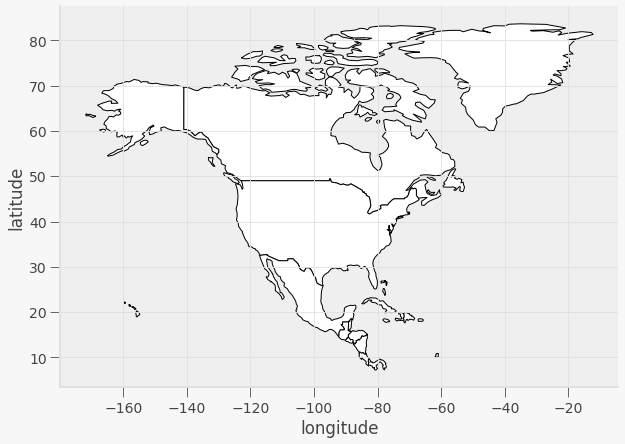

In [39]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("continent == 'North America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

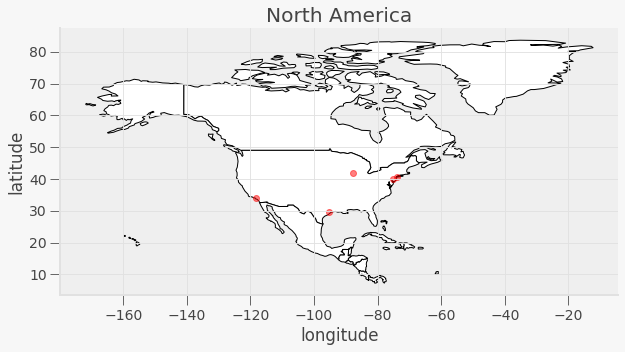

In [41]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("continent == 'North America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('North America')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()